In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
test.shape

(1459, 80)

In [ ]:
#Step 1 Data analysis and Cleaning

features_na=[feature for feature in test.columns if test[feature].isnull().sum()>1]
for feature in features_na:
  print(feature,np.round(test[feature].isnull().mean(),4))



MSZoning 0.0027
LotFrontage 0.1556
Alley 0.9267
Utilities 0.0014
MasVnrType 0.011
MasVnrArea 0.0103
BsmtQual 0.0302
BsmtCond 0.0308
BsmtExposure 0.0302
BsmtFinType1 0.0288
BsmtFinType2 0.0288
BsmtFullBath 0.0014
BsmtHalfBath 0.0014
Functional 0.0014
FireplaceQu 0.5003
GarageType 0.0521
GarageYrBlt 0.0535
GarageFinish 0.0535
GarageQual 0.0535
GarageCond 0.0535
PoolQC 0.9979
Fence 0.8012
MiscFeature 0.965


We looped a variable feature for each and every feature in all the coloumns to get the coloumns with Missing values and put them in a list. Then, we  and took the mean percentage of the null values in the particular feature and printed it out for all the features in the list.


We explored the relationship between the features with NaN values and our target variable. As from the plots, it's clearly visible that these features have a considerable amount of impact on the target variable.Hence, we will have to fill this NaN Values and replace them with something meaningful.

In [ ]:
numerical_features=[feature for feature in test.columns if test[feature].dtype!='O']
print('Length of Numerical Features:',len(numerical_features))
test[numerical_features].head()

Length of Numerical Features: 37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010


NUMERICAL VARIABLES:
We separated all the Numerical Variables from the Dataset and put it inside the list.

In [ ]:
temporal_variables=[feature for feature in numerical_features if 'Yr' in feature or'Year' in feature]
temporal_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in temporal_variables:
  print(feature,test[feature].unique())

YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974.

Temporal variables are the variables that vary as time changes. Here we separted Temporal variables from Numerial variables and printed them out .

After plotting Temporal Variables we can incur that there are some more data intrepretations that are yet need to be done since the prices in Yrsold are decling by the time which shouldn't happen.

In [ ]:
#Discrete Variables
discrete_variables=[feature for feature in numerical_features if len(test[feature].unique())<25 and feature not in temporal_variables]
print("Number of Discrete Variables:", len(discrete_variables))

Number of Discrete Variables: 16


In [ ]:
discrete_variables

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [ ]:
continuous_variables=[feature for feature in numerical_features if feature not in discrete_variables and feature not in temporal_variables and feature not in['Id']] 




In [ ]:
print('Continuous Variable: ', len(continuous_variables))

Continuous Variable:  16


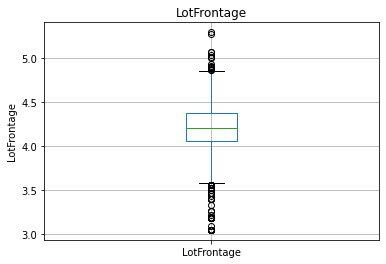

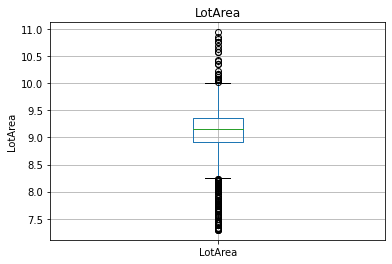

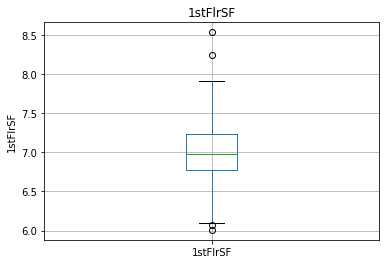

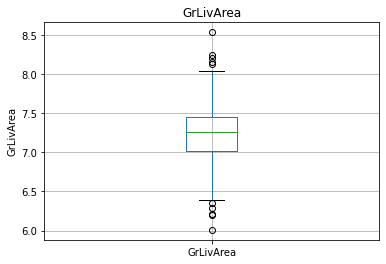

In [ ]:
##Outlier 
for feature in continuous_variables:
  test_set=test.copy()
  if 0 in test_set[feature].unique():
    pass
  else:
    test_set[feature]=np.log(test_set[feature])
    test_set.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [ ]:
#Categorical Variables
categorical_features=[feature for feature in test.columns if test[feature].dtype=='O']

In [ ]:
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
test[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for feature in categorical_features:
  print(feature,len(test[feature].unique()))

MSZoning 6
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
RoofStyle 6
RoofMatl 4
Exterior1st 14
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
KitchenQual 5
Functional 8
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 5
GarageCond 6
PavedDrive 3
PoolQC 3
Fence 5
MiscFeature 4
SaleType 10
SaleCondition 6


In [ ]:
features_nan=[feature for feature in test.columns if test[feature].isnull().sum()>1 and feature in categorical_features]
for feature in features_nan:
  print(feature,feature,np.round(test[feature].isnull().mean(),4))

MSZoning MSZoning 0.0027
Alley Alley 0.9267
Utilities Utilities 0.0014
MasVnrType MasVnrType 0.011
BsmtQual BsmtQual 0.0302
BsmtCond BsmtCond 0.0308
BsmtExposure BsmtExposure 0.0302
BsmtFinType1 BsmtFinType1 0.0288
BsmtFinType2 BsmtFinType2 0.0288
Functional Functional 0.0014
FireplaceQu FireplaceQu 0.5003
GarageType GarageType 0.0521
GarageFinish GarageFinish 0.0535
GarageQual GarageQual 0.0535
GarageCond GarageCond 0.0535
PoolQC PoolQC 0.9979
Fence Fence 0.8012
MiscFeature MiscFeature 0.965


In [ ]:
def replace_cat_feature(test,features_nan):
  test1=test.copy()
  test1[features_nan]= test1[features_nan].fillna('Unknown')
  return test1

 



In [ ]:
test=replace_cat_feature(test,features_nan)

In [ ]:
test[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
features_nuna=[feature for feature in test.columns if test[feature].isnull().sum()>1 and feature in numerical_features]
for feature in features_nuna:
  print(feature,np.round(test[feature].isnull().mean(),4))

LotFrontage 0.1556
MasVnrArea 0.0103
BsmtFullBath 0.0014
BsmtHalfBath 0.0014
GarageYrBlt 0.0535


In [ ]:
for feature in features_nuna:
  median_value=test[feature].median()
  test[feature].fillna(median_value,inplace=True)

test[features_nuna].isnull().sum()



LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [ ]:
log_features=[feature for feature in numerical_features if feature not in temporal_variables and feature in continuous_variables and test[feature].min()!=0]

In [ ]:
log_features

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [ ]:
for feature in log_features:
  test[feature]=np.log(test[feature])

In [ ]:
test[log_features].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.382027,9.360655,6.797940,6.797940
1,4.394449,9.565704,7.192182,7.192182
2,4.304065,9.534595,6.833032,7.395722
3,4.356709,9.208138,6.830874,7.380256
4,3.761200,8.518193,7.154615,7.154615


In [ ]:
for feature in categorical_features:
  per=test.groupby(feature)['YrSold'].count()/len(test)
  per_df=per[per>0.01].index
  test[feature]=np.where(test[feature].isin(per_df),test[feature],'rar_val')

In [ ]:
test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,rar_val,4.382027,9.360655,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Unknown,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Unknown,MnPrv,Unknown,0,6,2010,WD,Normal
1,1462,20,RL,4.394449,9.565704,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Unknown,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Unknown,Unknown,rar_val,12500,6,2010,WD,Normal
2,1463,60,RL,4.304065,9.534595,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Unknown,MnPrv,Unknown,0,3,2010,WD,Normal
3,1464,60,RL,4.356709,9.208138,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Unknown,Unknown,Unknown,0,6,2010,WD,Normal
4,1465,120,RL,3.761200,8.518193,Pave,Unknown,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Unknown,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Unknown,Unknown,Unknown,0,1,2010,WD,Normal
5,1466,60,RL,4.317488,9.210340,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,6.637258,892,0,7.411556,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,Unknown,Unknown,Unknown,0,4,2010,WD,Normal
6,1467,20,RL,4.204693,8.984694,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,7.079184,0,0,7.079184,1.0,0.0,2,0,3,1,TA,6,Typ,0,Unknown,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,Unknown,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,4.143135,9.036225,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,6.670766,676,0,7.289611,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,Unknown,Unknown,Unknown,0,5,2010,WD,Normal
8,1469,20,RL,4.442651,9.227787,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Un

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
sc=LabelEncoder()
for feature in categorical_features:
  test[feature]=sc.fit_transform(test[feature])
feature_scale=[feature for feature in test.columns if feature not in ['Id']]
scaler=MinMaxScaler()
scaler.fit(test[feature_scale])



MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
test_final=pd.concat([test['Id'].reset_index(drop=True),pd.DataFrame(scaler.transform(test[feature_scale]),columns=feature_scale)],axis=1)

In [ ]:
test_final.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.000000,1.00,0.593445,0.566360,0.0,1.0,0.666667,1.000000,0.0,0.75,0.0,0.45,0.166667,0.0,0.00,0.2,0.444444,0.625,0.625954,0.183333,0.0,0.0,0.7,0.727273,0.25,0.000000,1.000000,0.666667,0.25,0.75,0.5,0.75,0.666667,0.116708,0.500000,0.094364,0.126168,0.173111,0.0,0.75,1.0,0.666667,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.75,0.00,1.0,0.166667,0.211538,0.666667,0.2,0.490591,0.333333,0.333333,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.50,0.5,0.000000,0.454545,1.0,0.75,0.50
1,1462,0.000000,0.50,0.598957,0.622527,0.0,1.0,0.000000,1.000000,0.0,0.00,0.0,0.45,0.333333,0.0,0.00,0.2,0.555556,0.625,0.603053,0.133333,0.5,0.0,0.8,0.818182,0.00,0.083721,1.000000,0.666667,0.25,0.75,0.5,0.75,0.000000,0.230175,0.833333,0.000000,0.189720,0.260844,0.0,0.75,1.0,0.666667,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.75,0.00,1.0,0.166667,0.201923,0.666667,0.2,0.209677,0.333333,0.333333,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,1.0,0.735294,0.454545,1.0,0.75,0.50
2,1463,0.235294,0.50,0.558854,0.614005,0.0,1.0,0.000000,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.00,0.4,0.444444,0.500,0.900763,0.800000,0.0,0.0,0.7,0.727273,0.25,0.000000,1.000000,0.666667,0.50,0.50,0.5,0.75,0.333333,0.197257,0.833333,0.000000,0.064019,0.182139,0.0,0.50,1.0,0.666667,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.75,0.25,0.8,0.166667,0.326923,0.000000,0.4,0.323925,0.333333,0.333333,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.50,0.5,0.000000,0.181818,1.0,0.75,0.50
3,1464,0.235294,0.50,0.582212,0.524583,0.0,1.0,0.000000,1.000000,0.0,0.75,0.0,0.25,0.333333,0.0,0.00,0.4,0.555556,0.625,0.908397,0.800000,0.0,0.0,0.7,0.727273,0.00,0.015504,1.000000,0.666667,0.50,0.75,0.5,0.75,0.333333,0.150125,0.833333,0.000000,0.151402,0.181747,0.0,0.00,1.0,0.666667,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.75,0.25,0.4,0.166667,0.330128,0.000000,0.4,0.315860,0.333333,0.333333,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.000000,0.454545,1.0,0.75,0.50
4,1465,0.588235,0.50,0.317987,0.335596,0.0,1.0,0.000000,0.333333,0.0,0.75,0.0,0.90,0.333333,0.0,1.00,0.2,0.777778,0.500,0.862595,0.700000,0.0,0.0,0.3,0.363636,0.25,0.000000,0.666667,0.666667,0.50,0.50,0.5,0.75,0.000000,0.065586,0.833333,0.000000,0.475234,0.251227,0.0,0.00,1.0,0.666667,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.75,0.00,1.0,0.166667,0.310897,0.333333,0.4,0.340054,0.333333,0.333333,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.75,0.5,0.000000,0.000000,1.0,0.75,0.50
5,1466,0.235294,0.50,0.564810,0.525186,0.0,1.0,0.000000,1.000000,0.0,0.00,0.0,0.25,0.333333,0.0,0.00,0.4,0.555556,0.500,0.870229,0.733333,0.0,0.0,0.3,0.363636,0.25,0.000000,1.000000,0.666667,0.50,0.50,0.5,0.75,0.833333,0.000000,0.833333,0.000000,0.356542,0.149755,0.0,0.50,1.0,0.666667,0.248672,0.479055,0.0,0.555058,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.333333,0.75,0.25,0.8,0.166667,0.314103,0.000000,0.4,0.295699,0.333333,0.333333,1.0,0.110253,0.113208,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.000000,0.272727,1.0,0.75,0.5

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='test.csv') 
test_final.to_csv('X_test.zip',index=False,compression=compression_opts)